# **1. Ridge Regularization**
# **2. Lasso Regularization**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Connecting to dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Using melb_data dataset
df=pd.read_csv('/content/drive/MyDrive/Data Science_NG/Colab Notebooks/Datasets/melb_data.csv')
df.head()

,Unnamed: 0,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,1,2,h,1480000,S,Biggin,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra,144.9984,Northern Metropolitan,4019.0
1,2,2,h,1035000,S,Biggin,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,144.9934,Northern Metropolitan,4019.0
2,4,3,h,1465000,SP,Biggin,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,144.9944,Northern Metropolitan,4019.0
3,5,3,h,850000,PI,Biggin,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Yarra,144.9969,Northern Metropolitan,4019.0
4,6,4,h,1600000,VB,Nelson,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra,144.9941,Northern Metropolitan,4019.0


In [ ]:
df=df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          18396 non-null  int64  
 1   Type           18396 non-null  object 
 2   Price          18396 non-null  int64  
 3   Method         18396 non-null  object 
 4   SellerG        18396 non-null  object 
 5   Distance       18395 non-null  float64
 6   Postcode       18395 non-null  float64
 7   Bathroom       14925 non-null  float64
 8   Car            14820 non-null  float64
 9   Landsize       13603 non-null  float64
 10  BuildingArea   7762 non-null   float64
 11  YearBuilt      8958 non-null   float64
 12  CouncilArea    12233 non-null  object 
 13  Longtitude     15064 non-null  float64
 14  Regionname     18395 non-null  object 
 15  Propertycount  18395 non-null  float64
dtypes: float64(9), int64(2), object(5)
memory usage: 2.2+ MB


In [ ]:
df.isnull().sum()

,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Distance,1
Postcode,1
Bathroom,3471
Car,3576
Landsize,4793


In [ ]:
df["Car"].value_counts()

,count
Car,
2.0,6183
1.0,6072
0.0,1057
3.0,809
4.0,549
5.0,66
6.0,60
8.0,12
7.0,8


In [ ]:
df["Car"].replace(np.nan,2.0,inplace=True)

/tmp/ipython-input-2113177702.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Car"].replace(np.nan,2.0,inplace=True)


In [ ]:
df["BuildingArea"].fillna(df["BuildingArea"].mean(), inplace=True)

/tmp/ipython-input-4213258651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BuildingArea"].fillna(df["BuildingArea"].mean(), inplace=True)


In [ ]:
df["YearBuilt"].fillna(df["YearBuilt"].mean(), inplace=True)

/tmp/ipython-input-3941375897.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["YearBuilt"].fillna(df["YearBuilt"].mean(), inplace=True)


In [ ]:
df["CouncilArea"].value_counts()

,count
CouncilArea,
Moreland,1163
Boroondara,1160
Moonee Valley,999
Darebin,934
Glen Eira,848
Stonnington,719
Maribyrnong,694
Yarra,648
Port Phillip,628


In [ ]:
df["CouncilArea"].replace(np.nan,"Moreland",inplace=True)

/tmp/ipython-input-4266596636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CouncilArea"].replace(np.nan,"Moreland",inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          18396 non-null  int64  
 1   Type           18396 non-null  object 
 2   Price          18396 non-null  int64  
 3   Method         18396 non-null  object 
 4   SellerG        18396 non-null  object 
 5   Distance       18395 non-null  float64
 6   Postcode       18395 non-null  float64
 7   Bathroom       14925 non-null  float64
 8   Car            18396 non-null  float64
 9   Landsize       13603 non-null  float64
 10  BuildingArea   18396 non-null  float64
 11  YearBuilt      18396 non-null  float64
 12  CouncilArea    18396 non-null  object 
 13  Longtitude     15064 non-null  float64
 14  Regionname     18395 non-null  object 
 15  Propertycount  18395 non-null  float64
dtypes: float64(9), int64(2), object(5)
memory usage: 2.2+ MB


# **Handling Outliers**

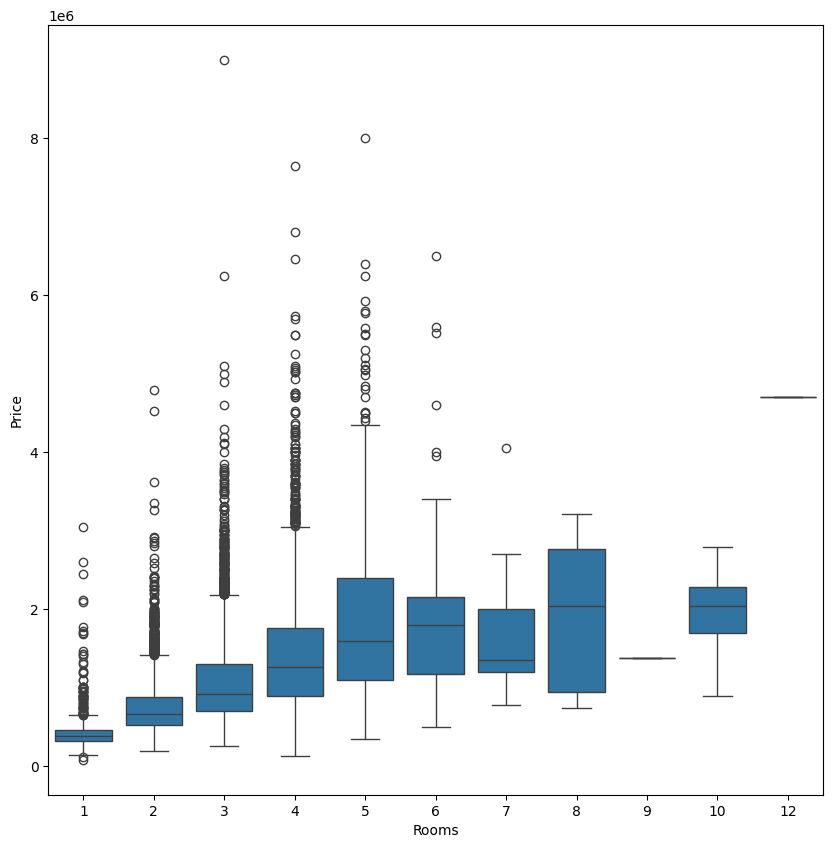

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x = "Rooms", y = "Price")
plt.show()

In [ ]:
df[(df["Rooms"] == 1) & (df["Price"] > 1000000)]

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
335,1,h,1435000,SP,Jellis,6.3,3143.0,2.0,1.0,144.0,107.000000,1900.000000,Stonnington,145.02280,Southern Metropolitan,4836.0
1428,1,h,1775000,S,Nick,11.2,3186.0,NaN,2.0,NaN,151.220219,1965.879996,Moreland,NaN,Southern Metropolitan,10579.0
2644,1,h,1007000,SP,Brad,7.8,3058.0,2.0,0.0,807.0,1.000000,1965.879996,Moreland,144.98250,Northern Metropolitan,11204.0
3945,1,h,2450000,S,Buxton,13.7,3188.0,2.0,0.0,994.0,151.220219,1965.879996,Bayside,145.01510,Southern Metropolitan,5454.0
4838,1,h,2605000,S,Jellis,7.4,3144.0,NaN,2.0,NaN,151.220219,1965.879996,Moreland,NaN,Southern Metropolitan,4675.0
5277,1,u,1685000,S,Nelson,6.9,3039.0,NaN,2.0,NaN,151.220219,1965.879996,Moreland,144.91670,Western Metropolitan,6232.0
5482,1,h,1330000,S,Brad,11.2,3042.0,1.0,1.0,846.0,151.220219,1965.879996,Moonee Valley,144.88720,Western Metropolitan,2291.0
6103,1,h,1014000,S,Chisholm,3.8,3207.0,1.0,0.0,151.0,151.220219,1965.879996,Port Phillip,144.94440,Southern Metropolitan,8648.0
7068,1,h,1002000,S,Marshall,2.1,3205.0,1.0,0.0,84.0,151.220219,1912.000000,Port Phillip,144.95480,Southern Metropolitan,5943.0
7217,1,h,2115000,S,Marshall,3.3,3141.0,1.0,1.0,569.0,151.220219,1965.879996,Stonnington,144.99100,Southern Metropolitan,14887.0


In [ ]:
df.drop([335,1428,2644,3945,4838,5277,5482,6103,7068,7217,7319,7439,8567,8711,9428,9658,9677,9788,10334,10356,12011,13005,13742,14716,16177], inplace=True)

In [ ]:
df[(df["Rooms"] == 1) & (df["Price"] > 800000)]

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
160,1,h,985000,S,Marshall,3.3,3206.0,1.0,0.0,81.0,54.000000,1900.000000,Port Phillip,144.94970,Southern Metropolitan,3280.0
1704,1,t,895000,S,Nelson,5.2,3056.0,1.0,0.0,0.0,151.220219,1965.879996,Moreland,144.96790,Northern Metropolitan,11918.0
2229,1,h,885000,S,Nelson,3.2,3054.0,1.0,0.0,93.0,151.220219,1965.879996,Yarra,144.96980,Northern Metropolitan,3106.0
3232,1,h,947500,S,Nelson,1.6,3065.0,1.0,0.0,87.0,66.000000,1980.000000,Yarra,144.98210,Northern Metropolitan,5825.0
3310,1,h,899000,S,Jellis,3.5,3068.0,1.0,0.0,153.0,151.220219,1965.879996,Yarra,144.97840,Northern Metropolitan,6244.0
6310,1,h,830000,SP,Barry,8.8,3072.0,1.0,0.0,397.0,151.220219,1930.000000,Darebin,145.01150,Northern Metropolitan,14577.0
6893,1,h,815000,PI,Dixon,2.6,3121.0,NaN,2.0,NaN,151.220219,1965.879996,Moreland,NaN,Northern Metropolitan,14949.0
7176,1,u,955000,PI,Williams,3.3,3141.0,1.0,1.0,0.0,85.000000,1965.879996,Stonnington,144.99100,Southern Metropolitan,14887.0
9956,1,h,950000,VB,Collins,3.5,3068.0,1.0,0.0,138.0,151.220219,1965.879996,Yarra,144.98230,Northern Metropolitan,6244.0
10476,1,h,860000,PI,hockingstuart,4.5,3181.0,1.0,0.0,108.0,54.000000,1905.000000,Stonnington,145.00510,Southern Metropolitan,7717.0


In [ ]:
df.drop([160,1704,2229,3232,3310,6310,6893,7176,9956,10476,10597,11048,12329,12362,13446,13596,14771,15299,16752,18137], inplace=True)

In [ ]:
df[(df["Rooms"] == 1) & (df["Price"] > 750000)]

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
1744,1,h,800000,PI,Walshe,5.2,3056.0,1.0,4.0,330.0,151.220219,1965.879996,Moreland,144.95240,Northern Metropolitan,11918.0
1813,1,h,772000,SP,Collins,5.2,3056.0,1.0,1.0,147.0,82.000000,1890.000000,Moreland,144.95840,Northern Metropolitan,11918.0
7074,1,u,760500,S,Marshall,2.1,3205.0,0.0,0.0,438.0,151.220219,1965.879996,Port Phillip,144.96000,Southern Metropolitan,5943.0
12330,1,t,780000,S,Nick,1.8,3051.0,1.0,0.0,37.0,151.220219,1965.879996,Melbourne,144.95379,Northern Metropolitan,6821.0


In [ ]:
df.drop([1744,1813,7074,12330], inplace=True)

In [ ]:
df[(df["Rooms"] == 1) & (df["Price"] > 650000)]

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
1506,1,u,671000,S,Buxton,11.2,3186.0,1.0,1.0,70.0,74.000000,1980.000000,Bayside,145.00030,Southern Metropolitan,10579.0
1628,1,t,681000,SP,Buxton,10.7,3187.0,1.0,1.0,166.0,60.000000,2012.000000,Bayside,145.01900,Southern Metropolitan,6938.0
5102,1,u,659000,S,Harcourts,2.8,3000.0,1.0,1.0,0.0,59.000000,2006.000000,Melbourne,144.97270,Northern Metropolitan,17496.0
5122,1,u,680000,S,MICM,2.8,3000.0,1.0,2.0,0.0,102.000000,1965.000000,Melbourne,144.95450,Northern Metropolitan,17496.0
5130,1,u,700000,VB,Castran,2.8,3000.0,1.0,1.0,0.0,64.000000,1920.000000,Melbourne,144.97270,Northern Metropolitan,17496.0
6802,1,u,681000,S,hockingstuart,2.6,3121.0,1.0,1.0,0.0,50.000000,2004.000000,Yarra,144.99060,Northern Metropolitan,14949.0
7260,1,u,661000,S,Williams,3.3,3141.0,NaN,2.0,NaN,151.220219,1965.879996,Moreland,NaN,Southern Metropolitan,14887.0
7284,1,u,687000,S,Kay,3.3,3141.0,1.0,2.0,0.0,151.220219,1965.879996,Stonnington,144.99220,Southern Metropolitan,14887.0
7502,1,u,665000,S,hockingstuart,6.1,3182.0,NaN,2.0,NaN,151.220219,1965.879996,Moreland,144.98120,Southern Metropolitan,13240.0
8113,1,u,750000,PI,Williams,4.6,3142.0,NaN,2.0,NaN,151.220219,1965.879996,Moreland,NaN,Southern Metropolitan,7217.0


In [ ]:
df.drop([1506,1628,5102,5122,5130,6802,7260,7284,7502,8113,8722,9004,13265,13787,15548], inplace=True)

In [ ]:
df[(df["Rooms"] == 1) & (df["Price"] > 620000)]

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
1747,1,t,625000,PI,Jellis,5.2,3056.0,1.0,1.0,82.0,114.000000,1930.000000,Moreland,144.9614,Northern Metropolitan,11918.0
4226,1,h,636000,S,Barry,9.4,3081.0,1.0,1.0,588.0,151.220219,1965.879996,Banyule,145.0397,Eastern Metropolitan,2674.0
5472,1,h,643700,SP,Greg,8.4,3015.0,1.0,0.0,129.0,45.000000,1900.000000,Hobsons Bay,144.8903,Western Metropolitan,5498.0
8721,1,u,630000,SP,Caine,1.5,3002.0,1.0,1.0,0.0,151.220219,1965.879996,Melbourne,144.9787,Northern Metropolitan,3040.0
9001,1,h,630000,S,Burnham,7.8,3012.0,1.0,1.0,370.0,151.220219,1965.879996,Maribyrnong,144.8783,Western Metropolitan,1808.0
11027,1,u,650000,VB,Walsh,4.6,3142.0,NaN,2.0,NaN,151.220219,1965.879996,Moreland,NaN,Southern Metropolitan,7217.0
14901,1,u,637000,S,RT,3.5,3207.0,NaN,2.0,NaN,151.220219,1965.879996,Moreland,NaN,Southern Metropolitan,8648.0
15343,1,u,645000,S,hockingstuart,2.7,3141.0,NaN,2.0,NaN,151.220219,1965.879996,Moreland,NaN,Southern Metropolitan,14887.0


In [ ]:
df.drop([1747,4226,5472,8721,9001,11027,14901,15343], inplace=True)

In [ ]:
df["Bathroom"].fillna(df["Bathroom"].mean(), inplace=True)

/tmp/ipython-input-1485185751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Bathroom"].fillna(df["Bathroom"].mean(), inplace=True)


In [ ]:
df["Landsize"].fillna(df["Landsize"].mean(), inplace=True)

/tmp/ipython-input-569969418.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Landsize"].fillna(df["Landsize"].mean(), inplace=True)


In [ ]:
df["Longtitude"].fillna(df["Longtitude"].mean(), inplace=True)

/tmp/ipython-input-997442569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Longtitude"].fillna(df["Longtitude"].mean(), inplace=True)


In [ ]:
df["Distance"].fillna(df["Distance"].mean(), inplace=True)

/tmp/ipython-input-909593625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Distance"].fillna(df["Distance"].mean(), inplace=True)


In [ ]:
df["Postcode"].fillna(df["Postcode"].mean(), inplace=True)

/tmp/ipython-input-2646923538.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Postcode"].fillna(df["Postcode"].mean(), inplace=True)


In [ ]:
df["Propertycount"].fillna(df["Longtitude"].mean(), inplace=True)

/tmp/ipython-input-3925108823.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Propertycount"].fillna(df["Longtitude"].mean(), inplace=True)


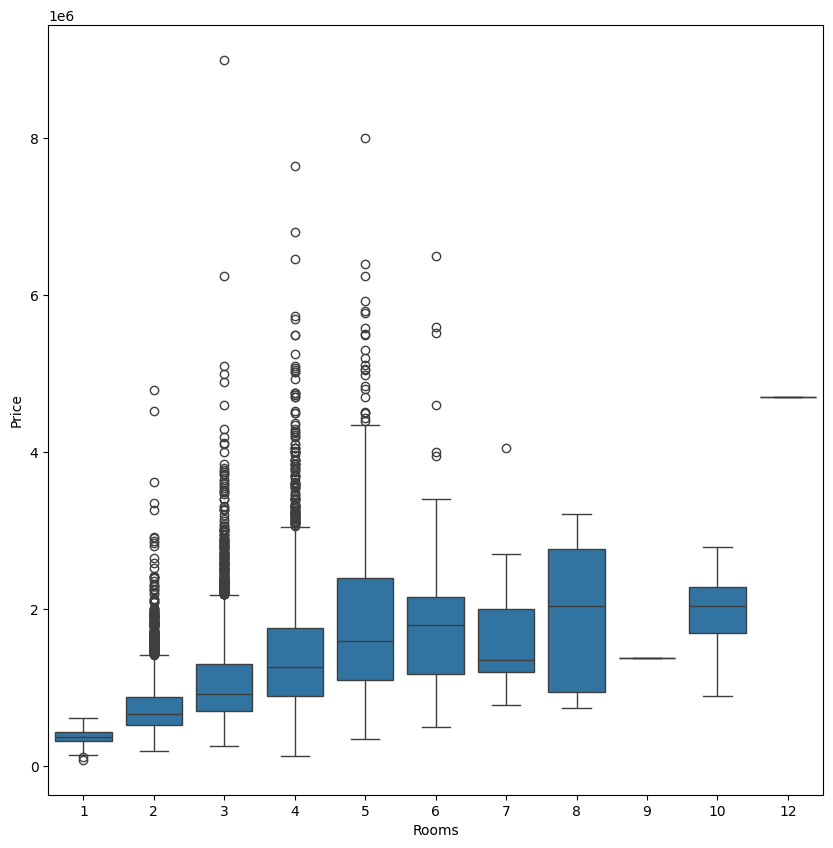

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x = "Rooms", y = "Price")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18324 entries, 0 to 18395
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          18324 non-null  int64  
 1   Type           18324 non-null  object 
 2   Price          18324 non-null  int64  
 3   Method         18324 non-null  object 
 4   SellerG        18324 non-null  object 
 5   Distance       18324 non-null  float64
 6   Postcode       18324 non-null  float64
 7   Bathroom       18324 non-null  float64
 8   Car            18324 non-null  float64
 9   Landsize       18324 non-null  float64
 10  BuildingArea   18324 non-null  float64
 11  YearBuilt      18324 non-null  float64
 12  CouncilArea    18324 non-null  object 
 13  Longtitude     18324 non-null  float64
 14  Regionname     18323 non-null  object 
 15  Propertycount  18324 non-null  float64
dtypes: float64(9), int64(2), object(5)
memory usage: 2.4+ MB


# **Handling Categorical data**

In [ ]:
df_cat = df.select_dtypes(object)
df_cat.head()

,Type,Method,SellerG,CouncilArea,Regionname
0,h,S,Biggin,Yarra,Northern Metropolitan
1,h,S,Biggin,Yarra,Northern Metropolitan
2,h,SP,Biggin,Yarra,Northern Metropolitan
3,h,PI,Biggin,Yarra,Northern Metropolitan
4,h,VB,Nelson,Yarra,Northern Metropolitan


In [ ]:
df_num = df.select_dtypes(["int64","float64"])
df_num.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Longtitude,Propertycount
0,2,1480000,2.5,3067.0,1.0,1.0,202.0,151.220219,1965.879996,144.9984,4019.0
1,2,1035000,2.5,3067.0,1.0,0.0,156.0,79.000000,1900.000000,144.9934,4019.0
2,3,1465000,2.5,3067.0,2.0,0.0,134.0,150.000000,1900.000000,144.9944,4019.0
3,3,850000,2.5,3067.0,2.0,1.0,94.0,151.220219,1965.879996,144.9969,4019.0
4,4,1600000,2.5,3067.0,1.0,2.0,120.0,142.000000,2014.000000,144.9941,4019.0


# **Using LabelEncoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [ ]:
df_cat.head()

,Type,Method,SellerG,CouncilArea,Regionname
0,0,1,29,31,2
1,0,1,29,31,2
2,0,3,29,31,2
3,0,0,29,31,2
4,0,4,178,31,2


In [ ]:
df_new = pd.concat([df_num,df_cat],axis=1)
df_new

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Longtitude,Propertycount,Type,Method,SellerG,CouncilArea,Regionname
0,2,1480000,2.5,3067.0,1.0,1.0,202.000000,151.220219,1965.879996,144.99840,4019.0,0,1,29,31,2
1,2,1035000,2.5,3067.0,1.0,0.0,156.000000,79.000000,1900.000000,144.99340,4019.0,0,1,29,31,2
2,3,1465000,2.5,3067.0,2.0,0.0,134.000000,150.000000,1900.000000,144.99440,4019.0,0,3,29,31,2
3,3,850000,2.5,3067.0,2.0,1.0,94.000000,151.220219,1965.879996,144.99690,4019.0,0,0,29,31,2
4,4,1600000,2.5,3067.0,1.0,2.0,120.000000,142.000000,2014.000000,144.99410,4019.0,0,4,178,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,2,622500,6.8,3016.0,2.0,1.0,559.349771,89.000000,2010.000000,144.90484,6380.0,1,3,100,23,6
18392,4,2500000,6.8,3016.0,1.0,5.0,866.000000,157.000000,1920.000000,144.89299,6380.0,0,0,254,23,6
18393,4,1100000,12.7,3085.0,3.0,2.0,559.349771,151.220219,1965.879996,145.10547,1369.0,0,1,38,23,2
18394,4,1285000,6.3,3013.0,1.0,1.0,362.000000,112.000000,1920.000000,144.88449,6543.0,0,3,273,23,6


In [ ]:
df_new.isnull().sum()

,0
Rooms,0
Price,0
Distance,0
Postcode,0
Bathroom,0
Car,0
Landsize,0
BuildingArea,0
YearBuilt,0
Longtitude,0


# **Building Baseline Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df_new.drop("Price",axis=1)
y = df_new["Price"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Train score
lr.score(X_train,y_train)

0.5412441210900868

In [ ]:
#Test score
lr.score(X_test,y_test)

In [ ]:
lr.coef_

array([ 2.27485220e+05, -4.93957801e+04,  1.27080435e+03,  1.82623281e+05,
        4.05225769e+04,  2.98478443e+00,  4.81609127e+01, -2.88510668e+03,
        1.39133412e+06, -1.99323517e+00, -1.92823309e+05, -5.48004924e+03,
       -1.62266033e+02, -3.22893329e+03,  4.64286327e+04])

# **Ridge and Lasso Regularization**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
l2 = Ridge(10)
l2.fit(X_train,y_train)
l2.coef_

array([ 2.28280366e+05, -4.94249636e+04,  1.33352292e+03,  1.84090775e+05,
        4.12396696e+04,  2.99148585e+00,  4.63794504e+01, -2.92529740e+03,
        1.22816738e+06, -2.11570509e+00, -1.90617498e+05, -5.68475315e+03,
       -1.66860394e+02, -3.46277706e+03,  4.29005683e+04])

In [ ]:
l1 = Lasso(1000)
l1.fit(X_train,y_train)
l1.coef_

array([ 2.28769036e+05, -4.93175653e+04,  1.33518040e+03,  1.82249949e+05,
        4.03841417e+04,  2.99862672e+00,  4.65634993e+01, -2.93051759e+03,
        1.21915725e+06, -2.14583700e+00, -1.89369521e+05, -4.94441671e+03,
       -1.67026590e+02, -3.47739388e+03,  4.24703717e+04])

In [ ]:
for i in range(50):
    l2 = Ridge(alpha=i)
    l2.fit(X_train,y_train)
    print(i,":",l2.score(X_test,y_test))

0 : 0.5290211981080432
1 : 0.5289442614065769
2 : 0.5288604280855485
3 : 0.5287702984483189
4 : 0.5286744257340118
5 : 0.5285733200825921
6 : 0.5284674521316547
7 : 0.5283572562827441
8 : 0.5282431336706175
9 : 0.5281254548651471
10 : 0.5280045623323998
11 : 0.5278807726785774
12 : 0.5277543786976916
13 : 0.527625651242063
14 : 0.5274948409323482
15 : 0.5273621797221577
16 : 0.5272278823310799
17 : 0.5270921475579022
18 : 0.5269551594853152
19 : 0.5268170885857018
20 : 0.5266780927370673
21 : 0.5265383181569578
22 : 0.5263979002616836
23 : 0.5262569644573959
24 : 0.5261156268688384
25 : 0.525973995011164
26 : 0.5258321684097296
27 : 0.52569023917212
28 : 0.5255482925165809
29 : 0.5254064072602953
30 : 0.52526465627096
31 : 0.5251231068845821
32 : 0.5249818212922918
33 : 0.5248408568985372
34 : 0.5247002666531756
35 : 0.5245600993592783
36 : 0.5244203999587216
37 : 0.5242812097972833
38 : 0.5241425668707134
39 : 0.5240045060534353
40 : 0.523867059311035
41 : 0.5237302558978443
42 : 0.52

In [ ]:
for i in range(300,1000,50):
    l1 = Lasso(alpha=i)
    l1.fit(X_train,y_train)
    print(i,":",l1.score(X_test,y_test))

300 : 0.5287695345698894
350 : 0.5287202128421767
400 : 0.5286687784056054
450 : 0.5286152312601917
500 : 0.5285595714059215
550 : 0.5285017988428048
600 : 0.5284419135708321
650 : 0.5283799155900126
700 : 0.5283158049003327
750 : 0.5282495815018062
800 : 0.5281812453944293
850 : 0.5281107965781964
900 : 0.5280382350531159
950 : 0.5279635608191839


In [ ]:
# Final models
l2 = Ridge(alpha=2)
l2.fit(X_train,y_train)
print(l2.score(X_test,y_test))

0.5288604280855485


In [ ]:
l2.coef_

array([ 2.27661871e+05, -4.94024404e+04,  1.28464915e+03,  1.82954400e+05,
        4.06794310e+04,  2.98622491e+00,  4.77668268e+01, -2.89396293e+03,
        1.35531935e+06, -2.02017398e+00, -1.92339484e+05, -5.52518441e+03,
       -1.63278531e+02, -3.28051348e+03,  4.56500111e+04])

In [ ]:
l1 = Lasso(alpha=500)
l1.fit(X_train,y_train)
print(l1.score(X_test,y_test))

0.5285595714059215


In [ ]:
l1.coef_

array([ 2.28129072e+05, -4.93567259e+04,  1.30299478e+03,  1.82435613e+05,
        4.04531579e+04,  2.99170788e+00,  4.73621322e+01, -2.90781388e+03,
        1.30524388e+06, -2.06953648e+00, -1.91095468e+05, -5.21223120e+03,
       -1.64645979e+02, -3.35316323e+03,  4.44494535e+04])

In [ ]:
lr.coef_

array([ 2.27485220e+05, -4.93957801e+04,  1.27080435e+03,  1.82623281e+05,
        4.05225769e+04,  2.98478443e+00,  4.81609127e+01, -2.88510668e+03,
        1.39133412e+06, -1.99323517e+00, -1.92823309e+05, -5.48004924e+03,
       -1.62266033e+02, -3.22893329e+03,  4.64286327e+04])

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

196960793349.78873

In [ ]:
#r2 score is very bad not close to 1
r2_score(y_test,y_pred)

0.5290211981080466

In [ ]:
residuals = y_test - y_pred

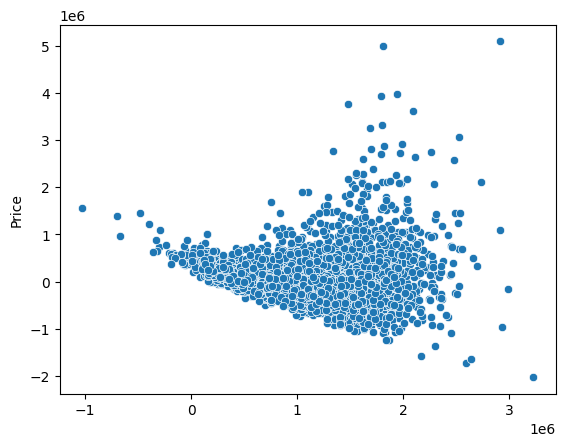

In [ ]:
plt.figure()
sns.scatterplot(x=y_pred, y=residuals)
plt.show()

/tmp/ipython-input-734346902.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


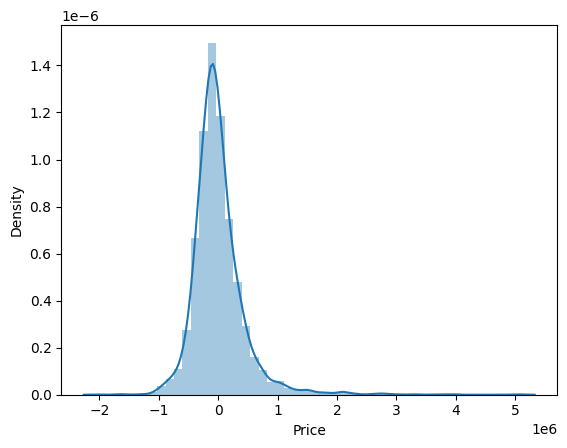

In [ ]:
plt.figure()
sns.distplot(residuals)
plt.show()

## **The END!**